In [35]:
from statsbombpy import sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Información: 

En esta prueba de concepto, se serializará un análisis predictivo, con el objetivo de predecir la probabilidad que tiene un tiro de convertirse en un gol o no.

Para esta prueba se han tomado los datos de la empresa Stats Bomb. Este dataset tiene los datos de los eventos de un montón de competiciones de futbol, tanto de europa como fuera. 

Para poner en práctica de este experimento, hemos filtrado los campeonatos de LaLiga, en los periodos del 2012 al 2021.

Se tomaron los eventos de cada uno de los partidos de las competiciones y filtramos por los eventos de tiros.

#### Modelos predictivos a utilizar:
- K-Nearest Neighbors (KNN)
- Regresión Logística
- Árbol de Decisiones
- Soporte de Vectores (SVM)

#### Nota: 
Se han obtenido los datos y se han guardado en un CSV, pero tambien ya se encuentra el csv en la carpeta, para no tener que genrar los datos.


In [36]:
#Imprimimos dataframe que contiene todos los campeonatos
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
62,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
63,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
64,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-07-17T21:19:03.032991,2023-07-17T21:21:56.497106,2023-07-17T21:21:56.497106,2023-07-17T21:19:03.032991
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


In [37]:
#Filtramos los pertenecientes a España
sb.competitions()[sb.competitions()['country_name']=='Spain']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
19,87,84,Spain,Copa del Rey,male,False,False,1983/1984,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00
20,87,268,Spain,Copa del Rey,male,False,False,1982/1983,2023-06-11T02:51:59.941964,None,None,2023-06-11T02:51:59.941964
21,87,279,Spain,Copa del Rey,male,False,False,1977/1978,2023-06-26T10:36:15.442581,None,None,2023-06-26T10:36:15.442581
35,11,90,Spain,La Liga,male,False,False,2020/2021,2023-07-26T14:11:01.312143,2023-07-26T14:15:15.217027,2023-07-26T14:15:15.217027,2023-07-26T14:11:01.312143
36,11,42,Spain,La Liga,male,False,False,2019/2020,2023-07-25T00:16:32.999467,2021-06-13T16:17:31.694,None,2023-07-25T00:16:32.999467
37,11,4,Spain,La Liga,male,False,False,2018/2019,2023-08-03T02:24:43.761907,2021-07-09T14:53:22.103024,None,2023-08-03T02:24:43.761907
38,11,1,Spain,La Liga,male,False,False,2017/2018,2023-07-24T13:03:48.574627,2021-06-13T16:17:31.694,None,2023-07-24T13:03:48.574627
39,11,2,Spain,La Liga,male,False,False,2016/2017,2023-07-25T00:14:55.260536,2021-06-13T16:17:31.694,None,2023-07-25T00:14:55.260536
40,11,27,Spain,La Liga,male,False,False,2015/2016,2023-07-24T21:52:42.890908,2021-06-13T16:17:31.694,None,2023-07-24T21:52:42.890908
41,11,26,Spain,La Liga,male,False,False,2014/2015,2023-07-24T21:50:15.215072,2021-06-13T16:17:31.694,None,2023-07-24T21:50:15.215072


In [38]:
sb.matches(competition_id=11, season_id=1)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,9880,2018-04-14,16:15:00.000,Spain - La Liga,2017/2018,Barcelona,Valencia,2,1,available,...,2021-06-13T16:17:31.694,32,Regular Season,Spotify Camp Nou,Carlos del Cerro Grande,Ernesto Valverde Tejedor,Marcelino García Toral,1.1.0,2,2
1,9912,2018-04-29,20:45:00.000,Spain - La Liga,2017/2018,RC Deportivo La Coruña,Barcelona,2,4,available,...,2021-06-13T16:17:31.694,35,Regular Season,Estadio Abanca-Riazor,Ricardo De Burgos Bengoetxea,Clarence Seedorf,Ernesto Valverde Tejedor,1.1.0,2,2
2,9924,2018-05-06,20:45:00.000,Spain - La Liga,2017/2018,Barcelona,Real Madrid,2,2,available,...,2021-06-13T16:17:31.694,36,Regular Season,Spotify Camp Nou,Alejandro José Hernández Hernández,Ernesto Valverde Tejedor,Zinédine Zidane,1.1.0,2,2
3,9855,2018-03-18,16:15:00.000,Spain - La Liga,2017/2018,Barcelona,Athletic Club,2,0,available,...,2021-06-13T16:17:31.694,29,Regular Season,Spotify Camp Nou,Santiago Jaime Latre,Ernesto Valverde Tejedor,José Ángel Ziganda Lacunza,1.1.0,2,2
4,9827,2018-03-01,21:00:00.000,Spain - La Liga,2017/2018,Las Palmas,Barcelona,1,1,available,...,2021-06-13T16:17:31.694,26,Regular Season,Estadio de Gran Canaria,Antonio Miguel Mateu Lahoz,Francisco Jémez Martín,Ernesto Valverde Tejedor,1.1.0,2,2
5,9799,2018-02-17,16:15:00.000,Spain - La Liga,2017/2018,Eibar,Barcelona,0,2,available,...,2021-06-13T16:17:31.694,24,Regular Season,Estadio Municipal de Ipurúa,Alejandro José Hernández Hernández,José Luis Mendilibar Etxebarria,Ernesto Valverde Tejedor,1.1.0,2,2
6,9636,2017-10-01,16:15:00.000,Spain - La Liga,2017/2018,Barcelona,Las Palmas,3,0,available,...,2021-06-13T16:17:31.694,7,Regular Season,Spotify Camp Nou,José Luis Munuera Montero,Ernesto Valverde Tejedor,Francisco Martín Ayestarán Barandiarán,1.1.0,2,2
7,9609,2017-09-19,22:00:00.000,Spain - La Liga,2017/2018,Barcelona,Eibar,6,1,available,...,2021-06-13T16:17:31.694,5,Regular Season,Spotify Camp Nou,Alejandro José Hernández Hernández,Ernesto Valverde Tejedor,José Luis Mendilibar Etxebarria,1.1.0,2,2
8,9575,2017-08-20,20:15:00.000,Spain - La Liga,2017/2018,Barcelona,Real Betis,2,0,available,...,2021-06-13T16:17:31.694,1,Regular Season,Spotify Camp Nou,Daniel Jesús Trujillo Suárez,Ernesto Valverde Tejedor,Enrique Setién Solar,1.1.0,2,None
9,9928,2018-05-09,20:00:00.000,Spain - La Liga,2017/2018,Barcelona,Villarreal,5,1,available,...,2021-06-13T16:17:31.694,34,Regular Season,Spotify Camp Nou,NaN,Ernesto Valverde Tejedor,Javier Calleja Revilla,1.1.0,2,None


In [39]:
#Optenemos los Id de todos los partidod de las temporadas que queremos.
torneo1 = sb.matches(competition_id=11, season_id=1)
torneo2 = sb.matches(competition_id=11, season_id=25)
torneo3 = sb.matches(competition_id=11, season_id=90)
torneo4 = sb.matches(competition_id=11, season_id=42)
torneo5 = sb.matches(competition_id=11, season_id=27)
torneo6 = sb.matches(competition_id=11, season_id=23)
torneo7 = sb.matches(competition_id=11, season_id=2)
torneo8 = sb.matches(competition_id=11, season_id=4)
torneo9 = sb.matches(competition_id=11, season_id=26)
torneo10 = sb.matches(competition_id=11, season_id=24)
match_ids = torneo1.match_id.to_list() + torneo2.match_id.to_list() + torneo3.match_id.to_list() + torneo4.match_id.to_list() + torneo5.match_id.to_list() + torneo6.match_id.to_list() + torneo7.match_id.to_list() + torneo8.match_id.to_list() + torneo9.match_id.to_list() + torneo10.match_id.to_list()

In [40]:
#Conseguimos todos los eventos de tiros de los partidos obtenidos anteriormente
from tqdm import tqdm
tiros_tot = pd.DataFrame()
for x in tqdm(range(0,len(match_ids))):
    partido = sb.events(match_id=match_ids[x])
    tiros = partido[partido.type == 'Shot']
    tiros_tot = tiros_tot.append(tiros)
    print(tiros_tot.shape)
   


  0%|                                                                                          | 0/690 [00:00<?, ?it/s]C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  0%|                                                                                  | 1/690 [00:01<12:21,  1.08s/it]

(29, 91)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  0%|▏                                                                                 | 2/690 [00:02<12:14,  1.07s/it]

(67, 94)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  0%|▎                                                                                 | 3/690 [00:03<11:25,  1.00it/s]

(95, 99)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  1%|▍                                                                                 | 4/690 [00:04<13:02,  1.14s/it]

(122, 99)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  1%|▌                                                                                 | 5/690 [00:05<12:07,  1.06s/it]

(144, 101)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  1%|▋                                                                                 | 6/690 [00:06<12:05,  1.06s/it]

(168, 101)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  1%|▊                                                                                 | 7/690 [00:07<13:27,  1.18s/it]

(201, 104)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  1%|▉                                                                                 | 8/690 [00:09<13:25,  1.18s/it]

(225, 106)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  1%|█                                                                                 | 9/690 [00:10<12:50,  1.13s/it]

(243, 106)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  1%|█▏                                                                               | 10/690 [00:11<13:04,  1.15s/it]

(276, 107)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  2%|█▎                                                                               | 11/690 [00:12<13:03,  1.15s/it]

(307, 107)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  2%|█▍                                                                               | 12/690 [00:13<11:50,  1.05s/it]

(332, 108)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  2%|█▌                                                                               | 13/690 [00:14<11:52,  1.05s/it]

(353, 108)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  2%|█▋                                                                               | 14/690 [00:15<12:17,  1.09s/it]

(387, 108)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  2%|█▊                                                                               | 15/690 [00:16<12:20,  1.10s/it]

(416, 108)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  2%|█▉                                                                               | 16/690 [00:17<11:18,  1.01s/it]

(439, 108)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  2%|█▉                                                                               | 17/690 [00:18<11:40,  1.04s/it]

(459, 108)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  3%|██                                                                               | 18/690 [00:19<11:49,  1.06s/it]

(491, 108)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  3%|██▏                                                                              | 19/690 [00:20<11:35,  1.04s/it]

(532, 108)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  3%|██▎                                                                              | 20/690 [00:21<12:37,  1.13s/it]

(553, 108)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  3%|██▍                                                                              | 21/690 [00:23<13:12,  1.18s/it]

(576, 108)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  3%|██▌                                                                              | 22/690 [00:24<13:00,  1.17s/it]

(601, 109)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  3%|██▋                                                                              | 23/690 [00:25<13:29,  1.21s/it]

(627, 110)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  3%|██▊                                                                              | 24/690 [00:26<12:23,  1.12s/it]

(652, 110)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  4%|██▉                                                                              | 25/690 [00:27<11:48,  1.07s/it]

(676, 110)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  4%|███                                                                              | 26/690 [00:28<12:05,  1.09s/it]

(698, 110)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  4%|███▏                                                                             | 27/690 [00:30<13:00,  1.18s/it]

(729, 110)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  4%|███▎                                                                             | 28/690 [00:30<12:08,  1.10s/it]

(749, 110)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  4%|███▍                                                                             | 29/690 [00:31<11:44,  1.07s/it]

(774, 110)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  4%|███▌                                                                             | 30/690 [00:33<12:13,  1.11s/it]

(794, 110)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  4%|███▋                                                                             | 31/690 [00:34<13:54,  1.27s/it]

(819, 110)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  5%|███▊                                                                             | 32/690 [00:35<13:00,  1.19s/it]

(848, 110)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  5%|███▊                                                                             | 33/690 [00:36<12:15,  1.12s/it]

(882, 110)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  5%|███▉                                                                             | 34/690 [00:37<11:49,  1.08s/it]

(915, 110)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  5%|████                                                                             | 35/690 [00:38<12:05,  1.11s/it]

(939, 111)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  5%|████▏                                                                            | 36/690 [00:40<12:46,  1.17s/it]

(971, 111)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  5%|████▎                                                                            | 37/690 [00:41<12:52,  1.18s/it]

(995, 111)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  6%|████▍                                                                            | 38/690 [00:42<12:13,  1.12s/it]

(1020, 111)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  6%|████▌                                                                            | 39/690 [00:43<11:53,  1.10s/it]

(1055, 111)


C:\Users\William\AppData\Local\Temp\ipykernel_14388\1292210125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiros_tot = tiros_tot.append(tiros)
  6%|████▋                                                                            | 40/690 [00:44<12:11,  1.13s/it]

(1084, 111)


  6%|████▋                                                                            | 40/690 [00:45<12:13,  1.13s/it]


KeyboardInterrupt: 

In [ ]:
#Agregar una columna nueva y guardamos el datesets con los datos de los partidos de interes
tiros_tot[['x','y']] = tiros_tot['location'].apply(pd.Series)
tiros_tot.to_csv('tirosStatsBomb_modeloxG_v3.csv')

### Data local

In [41]:
tiros_statsbomb = pd.read_csv('tirosStatsBomb_modeloxG_v3.csv')

C:\Users\William\AppData\Local\Temp\ipykernel_14388\577710164.py:1: DtypeWarning: Columns (37,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  tiros_statsbomb = pd.read_csv('tirosStatsBomb_modeloxG_v3.csv')


In [42]:
tiros_statsbomb

,Unnamed: 0,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,shot_follows_dribble,dribble_no_touch,injury_stoppage_in_chain,goalkeeper_lost_out,goalkeeper_lost_in_play,half_start_late_video_start,goalkeeper_success_out,half_end_early_video_end,x,y
0,3837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,21.3
1,3838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.9,28.4
2,3839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.5,26.0
3,3840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.2,46.0
4,3841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.8,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16829,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.3,54.2
16830,3556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.5,45.9
16831,3557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.3,49.3
16832,3558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.7,38.6


## Analisis Exploratorio

In [43]:
#Identificamos las columnas que se relacionan con los lanzamientos
booleanos = pd.Series(tiros_statsbomb.columns).str.contains('shot')
df_test = pd.concat([pd.Series(tiros_statsbomb.columns), booleanos], axis=1)
df_test[df_test.iloc[:,1] == True]

,0,1
28,goalkeeper_shot_saved_to_post,True
41,pass_assisted_shot_id,True
56,pass_shot_assist,True
72,shot_aerial_won,True
73,shot_body_part,True
74,shot_deflected,True
75,shot_end_location,True
76,shot_first_time,True
77,shot_freeze_frame,True
78,shot_key_pass_id,True


In [44]:
#Filtramos las variables que realmente nos pueden servir para el modelo
tiros_filt = tiros_statsbomb[['shot_aerial_won',             
'shot_body_part',               
'shot_first_time',
'shot_deflected',             
'shot_one_on_one',             
'shot_open_goal',              
'shot_outcome',                 
'shot_technique',               
'shot_type',              
'play_pattern',                 
'x',
'y'
]].reset_index(drop=True)

In [45]:
#Cambiamos a binaria la columna objetivo y creamos las variables de alguno y distancia al punto medio del arco, 
#son dos variables que agregarian mucho valor y que son muy determinantes al momento de anotra un gol
tiros_filt['goal'] = np.where(tiros_filt.shot_outcome == 'Goal', 1,0)
tiros_filt['Distance'] = np.sqrt(np.square(120-tiros_filt['x']) + np.square(40 - tiros_filt['y']))
tiros_filt['angulo'] = np.arctan(7.32 *tiros_filt['x'] /(tiros_filt['x']**2 + tiros_filt['y']**2 - (7.32/2)**2))


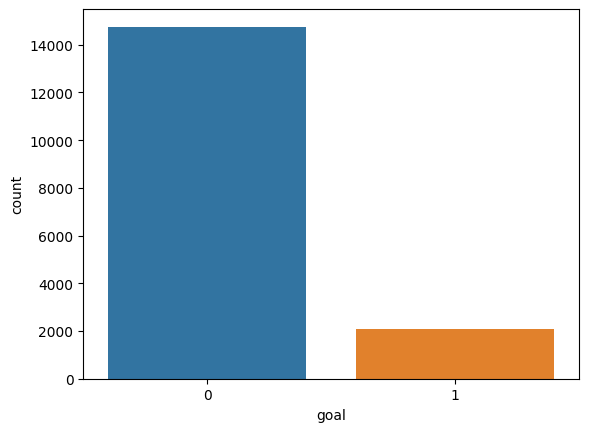

In [46]:
#Visualizamos como tenemos la ditribución de la variable objetivo 
sns.countplot(x='goal', data=tiros_filt)

# Mostrar el gráfico
plt.show()


Se logra ver que existe un gran desbalanceo de los datos. Por los que en lo adelante estaremos balanceándolo.

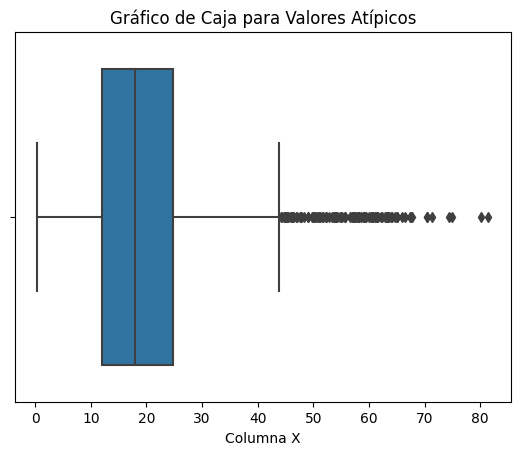

In [47]:
#Hacemos un poco de analisis exploratorio para ver si existen outlier
sns.boxplot(x=tiros_filt['Distance'])

plt.title('Gráfico de Caja para Valores Atípicos')
plt.xlabel('Columna X')

plt.show()


In [48]:
#Vemos la cantidad de datos que tenemos por encima de los 40

condicion = tiros_filt['Distance'] > 40

conteo = condicion.sum()

# Imprime el resultado
print(f"La cantidad de registros mayores a 60 en 'columna_x' es: {conteo}")


La cantidad de registros mayores a 60 en 'columna_x' es: 159


In [49]:
#Eliminados estos valores atípicos

condicion = tiros_filt['Distance'] > 40

tiros_filt = tiros_filt[~condicion]

Aqui logramos ver cuales son los datos que contienen mayor correlacion con los el atributo Gol.

## Prepocesamiento

In [50]:
#Sustituimos los valores vacios por False
tiros_filt.shot_aerial_won = tiros_filt.shot_aerial_won.fillna(False)
tiros_filt.shot_first_time = tiros_filt.shot_first_time.fillna(False)
tiros_filt.shot_one_on_one = tiros_filt.shot_one_on_one.fillna(False)
tiros_filt.shot_open_goal = tiros_filt.shot_open_goal.fillna(False)
tiros_filt.shot_deflected = tiros_filt.shot_open_goal.fillna(False)

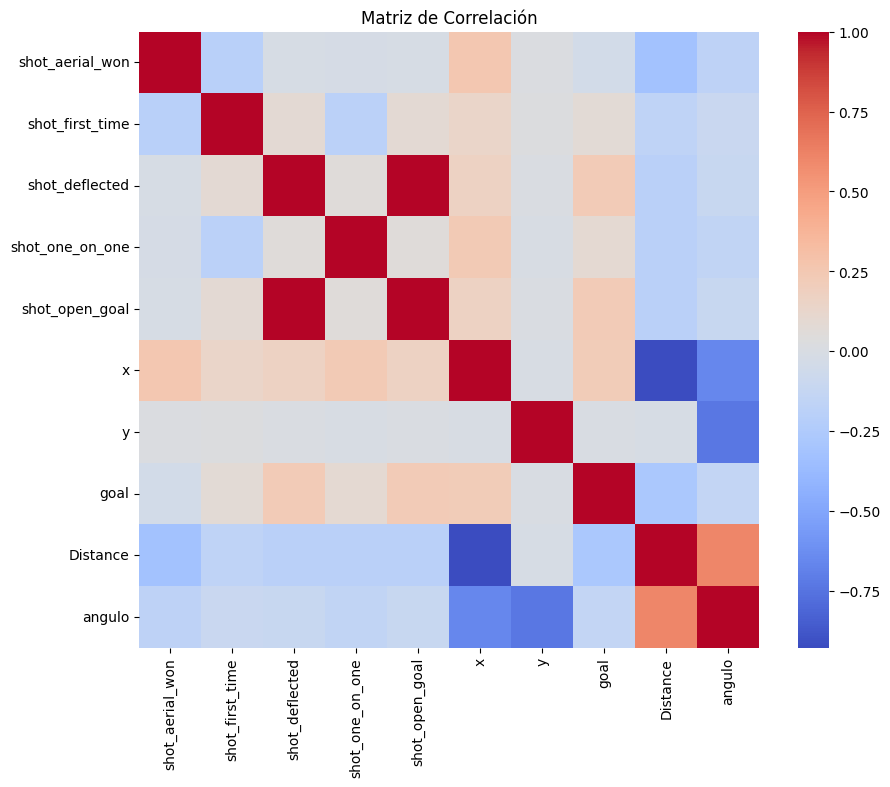

In [51]:
#Visualizamos la matriz de correlación

correlation_matrix = tiros_filt.corr()

# Crear un mapa de calor de la matriz de correlación sin valores ni barra de colores
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Matriz de Correlación")
plt.show()

In [60]:
tiros_filt = tiros_filt.drop(columns=['y', 'shot_technique', 'shot_first_time'])

In [61]:
#Hacemos Encoder para las variables categóricas

columns_to_encode = ['shot_body_part', 'shot_type', 'play_pattern']

# Crea una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplica Label Encoding a las columnas seleccionadas
for col in columns_to_encode:
    tiros_filt[col] = label_encoder.fit_transform(tiros_filt[col])



In [62]:
# Supongamos que 0 representa la clase mayoritaria y 1 representa la clase minoritaria
df_majority = tiros_filt[tiros_filt['goal'] == 0]
df_minority = tiros_filt[tiros_filt['goal'] == 1]

In [63]:
#Hacemos el over sample para balancear la var
oversample_factor = len(df_majority) // len(df_minority)

# Realiza el oversampling
oversampled_minority = df_minority.sample(n=len(df_minority) * oversample_factor, replace=True, random_state=42)

# Combina el DataFrame oversampled_minority con la clase mayoritaria
df_oversampled = pd.concat([df_majority, oversampled_minority], axis=0)


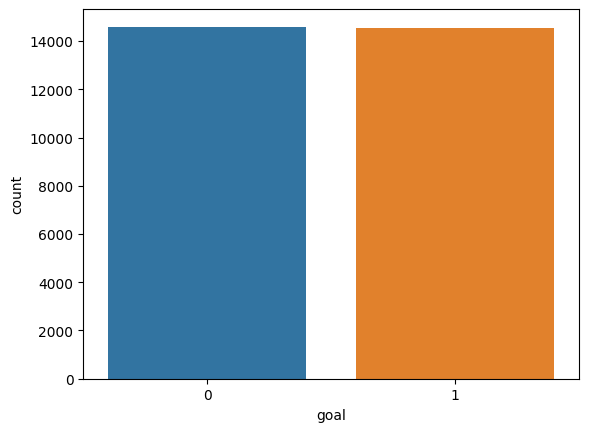

In [70]:
#Asi ha quedado la distribución
sns.countplot(x='goal', data=df_oversampled)

# Mostrar el gráfico
plt.show()

## Modelos Predictivos:

In [65]:
#Se Crean los datos de prueba y entrenamiento
y = df_oversampled['goal']
X = df_oversampled.drop(columns=['goal', 'shot_outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 13)

In [66]:
#Aplicación del modelo predictivo KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy: {:.2f}'.format(knn.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

C:\Users\William\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.93
[[2582  338]
 [  66 2843]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2920
           1       0.89      0.98      0.93      2909

    accuracy                           0.93      5829
   macro avg       0.93      0.93      0.93      5829
weighted avg       0.93      0.93      0.93      5829



C:\Users\William\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [67]:
#Aplicación del modelo predictivo Regresión lógica
from sklearn.linear_model import LogisticRegression
logitic_regressor = LogisticRegression()
logitic_regressor.fit(X_train, y_train)
y_pred = logitic_regressor.predict(X_test)
print('Accuracy: {:.2f}'.format(logitic_regressor.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.71
[[2003  917]
 [ 776 2133]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      2920
           1       0.70      0.73      0.72      2909

    accuracy                           0.71      5829
   macro avg       0.71      0.71      0.71      5829
weighted avg       0.71      0.71      0.71      5829



In [68]:
#Aplicación del modelo predictivo de Arbol de desiciones
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy: {:.2f}'.format(dt.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.94
[[2598  322]
 [   4 2905]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2920
           1       0.90      1.00      0.95      2909

    accuracy                           0.94      5829
   macro avg       0.95      0.94      0.94      5829
weighted avg       0.95      0.94      0.94      5829



In [69]:
#Aplicación del modelo predictivo de Suporte de Vectores 
from sklearn.svm import SVC
svm_classifier = SVC(gamma='auto')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print('Accuracy: {:.2f}'.format(svm_classifier.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.75
[[2049  871]
 [ 605 2304]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.74      2920
           1       0.73      0.79      0.76      2909

    accuracy                           0.75      5829
   macro avg       0.75      0.75      0.75      5829
weighted avg       0.75      0.75      0.75      5829



## Conclusiones:

En este análisis predictivo de tiros convertidos en gol, se evaluaron cuatro modelos de clasificación: K-Nearest Neighbors (KNN), Regresión Logística, Árbol de Decisiones y Soporte de Vectores (SVM). Cada uno de estos modelos se evaluó utilizando métricas de precisión, recall y F1-score en dos clases (0 y 1), además de la precisión global (accuracy).

Aquí están las conclusiones basadas en las métricas de rendimiento de cada modelo:

**K-Nearest Neighbors (KNN):**
- El modelo KNN logró una alta precisión general del 93%.
- Las métricas de precisión y recall para ambas clases (0 y 1) son igualmente altas, lo que indica que el modelo es capaz de predecir ambas clases de manera efectiva.
- El valor F1-score, que combina precisión y recall, también es alto, lo que sugiere un buen equilibrio entre ambas métricas.

**Regresión Logística:**
- La regresión logística obtuvo una precisión global del 71%, lo que indica un rendimiento moderado.
- Las métricas de precisión, recall y F1-score para ambas clases son similares y moderadas.
- El modelo parece tener un rendimiento equilibrado pero no tan alto como KNN o Árbol de Decisiones.

**Árbol de Decisiones:**
- El modelo de Árbol de Decisiones alcanzó una precisión general del 94%, la más alta entre los modelos evaluados.
- Las métricas de precisión y recall son altas para ambas clases, lo que indica una capacidad sólida para predecir ambas clases.
- El valor F1-score es alto, lo que sugiere un buen equilibrio entre precisión y recall.

**Soporte de Vectores (SVM):**
- El modelo SVM obtuvo una precisión general del 75%, lo que indica un rendimiento aceptable pero inferior en comparación con los otros modelos.
- Las métricas de precisión y recall son moderadas para ambas clases.
- El valor F1-score es ligeramente inferior en comparación con KNN y Árbol de Decisiones, pero aún así indica un rendimiento razonable.

En resumen, el modelo de Árbol de Decisiones parece ser el mejor clasificador para este problema de predicción de tiros convertidos en gol, con la precisión más alta y un buen equilibrio entre precisión y recall. 